<a href="https://colab.research.google.com/github/Tejesh-45/data-mining/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [13]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)
print(data)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [16]:
data_with_outliers=np.concatenate([data,outliers])

df=pd.DataFrame(data_with_outliers,columns=['value'])

Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_iqr=df[]

-2.3232332563637335
2.372622015963629


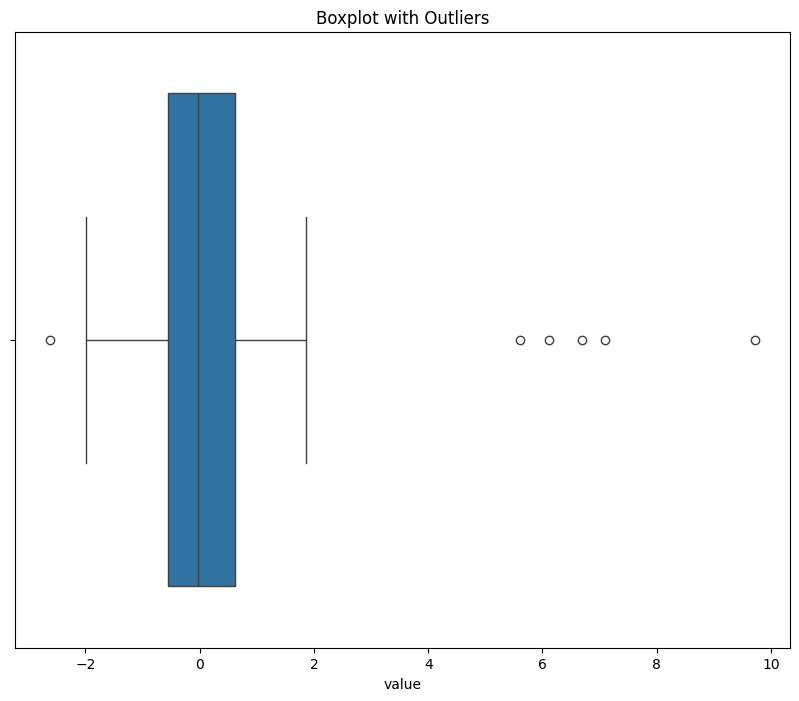

In [21]:
outliers_iqr=df[(df['value']<lower_bound) | (df['value']>upper_bound)]
z_scores=stats.zscore(df['value'])
outliers_z=df[np.abs(z_scores)>3]
plt.figure(figsize=(10,8))
sns.boxplot(x=df['value'])
plt.title('Boxplot with Outliers')
plt.show()

In [25]:
df_capped=df.copy()
df_capped['value']=np.clip(df_capped['value'],lower_bound,upper_bound)
print(df)

        value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549

[105 rows x 1 columns]


In [26]:
df_removed=df.copy()
df_removed=df_removed[(df_removed['value']>=lower_bound) &
(df_removed['value']<=upper_bound)]
print(df_removed)

       value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [27]:
df_imputed=df.copy()
median_value=df_imputed['value'].median()
df_imputed['value']=np.where((df_imputed['value']<lower_bound) |
(df_imputed['value']>upper_bound),median_value,df_imputed['value'])
print(df_imputed)


        value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100 -0.035826
101 -0.035826
102 -0.035826
103 -0.035826
104 -0.035826

[105 rows x 1 columns]
